In [29]:
import CoolProp.CoolProp as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
import os

plt.rcParams["pdf.fonttype"]=42
plt.rcParams["font.size"] =16

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'


In [19]:
mi18=pd.read_excel(os.path.join(os.getcwd(),"Literature data","Supplement_Wieser_et_al_G3.xlsx"),sheet_name="Melt_Inclusions")
# mi18.columns=mi18.iloc[7]
# mi18=mi18.iloc[8:111]
mi18['MagmaSat_err']=mi18['Magmasat Saturation Pressure Max CO2 (glass+bubble, PEC corr,+1 sigma splitting +1 sigmabubble vol)']-mi18['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)']
mi18['Depth (km)_ryanlerner']=pf.convert_pressure_to_depth(P_kbar=mi18['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)']/1000,model='ryan_lerner')
fi18=pd.read_excel(os.path.join(os.getcwd(),"Literature data","GPL2404_TS-1-TS-7.xlsx"),sheet_name="Table S-1 Kīlauea FI")
fi18.columns=fi18.iloc[7]
fi18=fi18.iloc[8:110]
                                                            
fi23=pd.read_excel("S2_SI_Dataset_final.xlsx", sheet_name='TableS-1 Full data (Raman+EDS)', skiprows=[0, 2])

day1day2=pd.read_excel("S2_SI_Dataset_final.xlsx", sheet_name='TableS-2 All Raman analyses', skiprows=[0, 2])

day1=day1day2[day1day2['date'].str.contains('September 20')]
day2_og=day1day2[day1day2['date'].str.contains('September 21|September 20')]

fi23=fi23.drop(columns=fi23.filter(like='Unnamed'))
day1=day1.drop(columns=day1.filter(like='Unnamed'))
day2_og=day2_og.drop(columns=day2_og.filter(like='Unnamed'))

# ##############################################################################

display(day1.head())
display(day2_og.head())
display(fi23.head())

,Column headers,py_index,Discarded,filename,Crystal Name,FI Name,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),...,XH2O_mol_max,P_kbar_mixCO2_DZ06_Hloss_i5_min,XH2O_i5_min,P_mix_min/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_i5_av,XH2O_i5_av,P_mix_av/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_i5_max,XH2O_i5_max,P_mix_max/P_pureCO2
0,NaN,0,NaN,K23_10_FIA_50X,K23_10,K23_10_FIA,0.131039,0.004066,0.001310,0.003849,...,0.132978,0.399764,0.038394,1.042109,0.416805,0.078253,1.086529,0.434774,0.116742,1.133371
1,NaN,1,NaN,K23_1_FIA_50X,K23_1,K23_1_FIA,0.144743,0.003971,0.000827,0.003884,...,0.118561,0.444269,0.034299,1.037257,0.461456,0.070588,1.077384,0.479493,0.105732,1.119494
2,NaN,2,NaN,K23_1_FIA_50X_r2_longeraq,K23_1,K23_1_FIA,0.141096,0.003930,0.000660,0.003874,...,0.122119,0.432331,0.035315,1.038486,0.449465,0.072472,1.079644,0.467465,0.108426,1.122879
3,NaN,3,NaN,K23_2_FIA_50X,K23_2,K23_2_FIA,0.004106,0.000000,0.000000,0.000000,...,0.426393,0.012630,0.123733,1.141147,0.015041,0.264439,1.358940,0.018939,0.416078,1.711116
4,NaN,4,NaN,K23_2_FIB_50X,K23_2,K23_2_FIB,0.063799,0.004039,0.001325,0.003816,...,0.249828,0.192069,0.071136,1.078064,0.208012,0.143758,1.167550,0.226231,0.213913,1.269811


,Column headers,py_index,Discarded,filename,Crystal Name,FI Name,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),...,XH2O_mol_max,P_kbar_mixCO2_DZ06_Hloss_i5_min,XH2O_i5_min,P_mix_min/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_i5_av,XH2O_i5_av,P_mix_av/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_i5_max,XH2O_i5_max,P_mix_max/P_pureCO2
0,NaN,0,NaN,K23_10_FIA_50X,K23_10,K23_10_FIA,0.131039,0.004066,0.001310,0.003849,...,0.132978,0.399764,0.038394,1.042109,0.416805,0.078253,1.086529,0.434774,0.116742,1.133371
1,NaN,1,NaN,K23_1_FIA_50X,K23_1,K23_1_FIA,0.144743,0.003971,0.000827,0.003884,...,0.118561,0.444269,0.034299,1.037257,0.461456,0.070588,1.077384,0.479493,0.105732,1.119494
2,NaN,2,NaN,K23_1_FIA_50X_r2_longeraq,K23_1,K23_1_FIA,0.141096,0.003930,0.000660,0.003874,...,0.122119,0.432331,0.035315,1.038486,0.449465,0.072472,1.079644,0.467465,0.108426,1.122879
3,NaN,3,NaN,K23_2_FIA_50X,K23_2,K23_2_FIA,0.004106,0.000000,0.000000,0.000000,...,0.426393,0.012630,0.123733,1.141147,0.015041,0.264439,1.358940,0.018939,0.416078,1.711116
4,NaN,4,NaN,K23_2_FIB_50X,K23_2,K23_2_FIB,0.063799,0.004039,0.001325,0.003816,...,0.249828,0.192069,0.071136,1.078064,0.208012,0.143758,1.167550,0.226231,0.213913,1.269811


,Column headers,py_index,Crystal Name,FI Name,Reported density mean of reps?,Density g/cm3,"σ Density g/cm3 (as plotted, from DiadFit for individual, Std dev for averaged FI)",STDofreps_Density g/cm3,σ Density g/cm3 (DiadFit),σ Density g/cm3 (from Ne+peakfit),...,XH2O_mol_max,P_kbar_mixCO2_DZ06_Hloss_iteration5_min,XH2O_iteration5_min,P_mix_min/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_iteration5_av,XH2O_iteration5_av,P_mix_av/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_iteration5_max,XH2O_iteration5_max,P_mix_max/P_pureCO2
0,NaN,0,K23_101,K23_101_FIC,No,0.085665,0.007736,NaN,0.007736,0.006738,...,0.186487,0.283699,0.053569,1.053743,0.300597,0.107846,1.116509,0.318960,0.160045,1.184715
1,NaN,1,K23_101,K23_101_FID,No,0.100137,0.005037,NaN,0.005037,0.003301,...,0.160422,0.332672,0.046297,1.045784,0.349657,0.093476,1.099175,0.367821,0.138888,1.156277
2,NaN,2,K23_102,K23_102_FIA,No,0.112454,0.004482,NaN,0.004482,0.002350,...,0.141894,0.374628,0.041096,1.040210,0.391640,0.083402,1.087447,0.409664,0.124194,1.137491
3,NaN,3,K23_10,K23_10_FIA,No,0.131039,0.004066,NaN,0.004066,0.001310,...,0.123899,0.424947,0.035974,1.035015,0.442067,0.073697,1.076713,0.460070,0.110177,1.120562
4,NaN,4,K23_1,K23_1_FIA,Yes,0.142919,0.002579,0.002579,0.003950,0.000744,...,0.110034,0.474808,0.031950,1.030739,0.492191,0.066293,1.068475,0.510410,0.099630,1.108026


## Calculate XH2O

In [20]:
import pickle

# Load the polynomial using pickle
with open(r"XH2O_from_MI_Kilauea_min.pkl", 'rb') as f:
    Pf_min = pickle.load(f)
with open(r"XH2O_from_MI_Kilauea.pkl", 'rb') as f:
    Pf_av = pickle.load(f)
with open(r"XH2O_from_MI_Kilauea_max.pkl", 'rb') as f:
    Pf_max = pickle.load(f)

for day in [day1,day2_og,day1day2,fi23]:
    if 'SingleFI_P_kbar' in day.columns.values:
        day['XH2O_mol_min']=1-Pf_min(day['SingleFI_P_kbar']*100)
        day['XH2O_mol_av']=1-Pf_av(day['SingleFI_P_kbar']*100)
        day['XH2O_mol_max']=1-Pf_max(day['SingleFI_P_kbar']*100)
    else:
        day['XH2O_mol_min']=1-Pf_min(day['P_kbar_1150C']*100)
        day['XH2O_mol_av']=1-Pf_av(day['P_kbar_1150C']*100)
        day['XH2O_mol_max']=1-Pf_max(day['P_kbar_1150C']*100)

display(day1.head())
display(day2_og.head())
display(day1day2.head())
display(fi23.head())

,Column headers,py_index,Discarded,filename,Crystal Name,FI Name,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),...,XH2O_mol_max,P_kbar_mixCO2_DZ06_Hloss_i5_min,XH2O_i5_min,P_mix_min/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_i5_av,XH2O_i5_av,P_mix_av/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_i5_max,XH2O_i5_max,P_mix_max/P_pureCO2
0,NaN,0,NaN,K23_10_FIA_50X,K23_10,K23_10_FIA,0.131039,0.004066,0.001310,0.003849,...,0.132978,0.399764,0.038394,1.042109,0.416805,0.078253,1.086529,0.434774,0.116742,1.133371
1,NaN,1,NaN,K23_1_FIA_50X,K23_1,K23_1_FIA,0.144743,0.003971,0.000827,0.003884,...,0.118561,0.444269,0.034299,1.037257,0.461456,0.070588,1.077384,0.479493,0.105732,1.119494
2,NaN,2,NaN,K23_1_FIA_50X_r2_longeraq,K23_1,K23_1_FIA,0.141096,0.003930,0.000660,0.003874,...,0.122119,0.432331,0.035315,1.038486,0.449465,0.072472,1.079644,0.467465,0.108426,1.122879
3,NaN,3,NaN,K23_2_FIA_50X,K23_2,K23_2_FIA,0.004106,0.000000,0.000000,0.000000,...,0.426393,0.012630,0.123733,1.141147,0.015041,0.264439,1.358940,0.018939,0.416078,1.711116
4,NaN,4,NaN,K23_2_FIB_50X,K23_2,K23_2_FIB,0.063799,0.004039,0.001325,0.003816,...,0.249828,0.192069,0.071136,1.078064,0.208012,0.143758,1.167550,0.226231,0.213913,1.269811


,Column headers,py_index,Discarded,filename,Crystal Name,FI Name,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),...,XH2O_mol_max,P_kbar_mixCO2_DZ06_Hloss_i5_min,XH2O_i5_min,P_mix_min/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_i5_av,XH2O_i5_av,P_mix_av/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_i5_max,XH2O_i5_max,P_mix_max/P_pureCO2
0,NaN,0,NaN,K23_10_FIA_50X,K23_10,K23_10_FIA,0.131039,0.004066,0.001310,0.003849,...,0.132978,0.399764,0.038394,1.042109,0.416805,0.078253,1.086529,0.434774,0.116742,1.133371
1,NaN,1,NaN,K23_1_FIA_50X,K23_1,K23_1_FIA,0.144743,0.003971,0.000827,0.003884,...,0.118561,0.444269,0.034299,1.037257,0.461456,0.070588,1.077384,0.479493,0.105732,1.119494
2,NaN,2,NaN,K23_1_FIA_50X_r2_longeraq,K23_1,K23_1_FIA,0.141096,0.003930,0.000660,0.003874,...,0.122119,0.432331,0.035315,1.038486,0.449465,0.072472,1.079644,0.467465,0.108426,1.122879
3,NaN,3,NaN,K23_2_FIA_50X,K23_2,K23_2_FIA,0.004106,0.000000,0.000000,0.000000,...,0.426393,0.012630,0.123733,1.141147,0.015041,0.264439,1.358940,0.018939,0.416078,1.711116
4,NaN,4,NaN,K23_2_FIB_50X,K23_2,K23_2_FIB,0.063799,0.004039,0.001325,0.003816,...,0.249828,0.192069,0.071136,1.078064,0.208012,0.143758,1.167550,0.226231,0.213913,1.269811


,Column headers,py_index,Discarded,filename,Crystal Name,FI Name,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),...,XH2O_mol_max,P_kbar_mixCO2_DZ06_Hloss_i5_min,XH2O_i5_min,P_mix_min/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_i5_av,XH2O_i5_av,P_mix_av/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_i5_max,XH2O_i5_max,P_mix_max/P_pureCO2
0,NaN,0,NaN,K23_10_FIA_50X,K23_10,K23_10_FIA,0.131039,0.004066,0.001310,0.003849,...,0.132978,0.399764,0.038394,1.042109,0.416805,0.078253,1.086529,0.434774,0.116742,1.133371
1,NaN,1,NaN,K23_1_FIA_50X,K23_1,K23_1_FIA,0.144743,0.003971,0.000827,0.003884,...,0.118561,0.444269,0.034299,1.037257,0.461456,0.070588,1.077384,0.479493,0.105732,1.119494
2,NaN,2,NaN,K23_1_FIA_50X_r2_longeraq,K23_1,K23_1_FIA,0.141096,0.003930,0.000660,0.003874,...,0.122119,0.432331,0.035315,1.038486,0.449465,0.072472,1.079644,0.467465,0.108426,1.122879
3,NaN,3,NaN,K23_2_FIA_50X,K23_2,K23_2_FIA,0.004106,0.000000,0.000000,0.000000,...,0.426393,0.012630,0.123733,1.141147,0.015041,0.264439,1.358940,0.018939,0.416078,1.711116
4,NaN,4,NaN,K23_2_FIB_50X,K23_2,K23_2_FIB,0.063799,0.004039,0.001325,0.003816,...,0.249828,0.192069,0.071136,1.078064,0.208012,0.143758,1.167550,0.226231,0.213913,1.269811


,Column headers,py_index,Crystal Name,FI Name,Reported density mean of reps?,Density g/cm3,"σ Density g/cm3 (as plotted, from DiadFit for individual, Std dev for averaged FI)",STDofreps_Density g/cm3,σ Density g/cm3 (DiadFit),σ Density g/cm3 (from Ne+peakfit),...,XH2O_mol_max,P_kbar_mixCO2_DZ06_Hloss_iteration5_min,XH2O_iteration5_min,P_mix_min/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_iteration5_av,XH2O_iteration5_av,P_mix_av/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_iteration5_max,XH2O_iteration5_max,P_mix_max/P_pureCO2
0,NaN,0,K23_101,K23_101_FIC,No,0.085665,0.007736,NaN,0.007736,0.006738,...,0.186487,0.283699,0.053569,1.053743,0.300597,0.107846,1.116509,0.318960,0.160045,1.184715
1,NaN,1,K23_101,K23_101_FID,No,0.100137,0.005037,NaN,0.005037,0.003301,...,0.160422,0.332672,0.046297,1.045784,0.349657,0.093476,1.099175,0.367821,0.138888,1.156277
2,NaN,2,K23_102,K23_102_FIA,No,0.112454,0.004482,NaN,0.004482,0.002350,...,0.141894,0.374628,0.041096,1.040210,0.391640,0.083402,1.087447,0.409664,0.124194,1.137491
3,NaN,3,K23_10,K23_10_FIA,No,0.131039,0.004066,NaN,0.004066,0.001310,...,0.123899,0.424947,0.035974,1.035015,0.442067,0.073697,1.076713,0.460070,0.110177,1.120562
4,NaN,4,K23_1,K23_1_FIA,Yes,0.142919,0.002579,0.002579,0.003950,0.000744,...,0.110034,0.474808,0.031950,1.030739,0.492191,0.066293,1.068475,0.510410,0.099630,1.108026


## Now recalculate using XH2O

In [21]:
master_dict={}
for poly in [Pf_min,Pf_av,Pf_max]:

    df_dict={}
    for index,day in enumerate([day1,day2_og,day1day2,fi23]):

        if day is fi23:
            P_initial=day['SingleFI_P_kbar']*100
        else:
            P_initial=day['P_kbar_1150C']*100
        
        P=P_initial
        P_iterations=P_initial/100
        # Loop 10 times
        for _ in range(5):
            XH2O_calc = 1-poly(P)
            if day is fi23:
                T=day['Temp_from_Fo']
            else:
                T=day['T_C']
            Pressure_H_loss = pf.calculate_entrapment_P_XH2O(XH2O=XH2O_calc, CO2_dens_gcm3=day['Density g/cm3'],
                                                            T_K=T + 273.15, T_K_ambient=37 + 273.15).P_kbar_mixCO2_DZ06_Hloss
            P = Pressure_H_loss * 100 
            P_iterations=pd.concat([P_iterations,Pressure_H_loss.rename(f'P_kbar_mixCO2_DZ06_Hloss_i{_+1}'),pd.Series(XH2O_calc).rename(f'XH2O_i{_+1}')],axis=1)
        if index==0:
            key='day1'
        elif index==1:
            key='day2_og'
        elif index==2:
            key='day1day2'
        elif index==3:
            key='fi23'
        
        df_dict[key]=P_iterations

    dict_ratios={}
    for day in ['day1','day2_og','day1day2','fi23']:

        new_columns=pd.DataFrame([])
        for i, col in enumerate(df_dict[day].columns):
            if i != 0:  # Skip the first column
                new_col_name = f'ratio_{i}'
                new_columns[new_col_name] = df_dict[day][col] / df_dict[day].iloc[:, i-1]

        df = pd.concat([df_dict[day], new_columns], axis=1)
        
        dict_ratios[day]=df
    
    if poly is Pf_min:
        key='H2O_min'
    elif poly is Pf_av:
        key='H2O_av'
    elif poly is Pf_max:
        key='H2O_max'
    master_dict[key]=dict_ratios
print('done')

done


In [22]:
datasets = ['day1', 'day2_og', 'day1day2','fi23']

for day,dataset in zip([day1,day2_og,day1day2,fi23],['day1', 'day2_og', 'day1day2','fi23']):
        for key in ['min', 'av', 'max']:
            day[f'P_kbar_mixCO2_DZ06_Hloss_i5_{key}'] = master_dict[f'H2O_{key}'][dataset]['P_kbar_mixCO2_DZ06_Hloss_i5']
            day[f'XH2O_i5_{key}'] = master_dict[f'H2O_{key}'][dataset]['XH2O_i5']

            if day is not fi23:
                day[f'P_mix_{key}/P_pureCO2'] = day[f'P_kbar_mixCO2_DZ06_Hloss_i5_{key}'] / day['P_kbar_1150C']
            else:
                day[f'P_mix_{key}/P_pureCO2'] = day[f'P_kbar_mixCO2_DZ06_Hloss_i5_{key}'] / day['SingleFI_P_kbar']
                 
fi23.iloc[:, -12:].to_clipboard(excel=True)
fi23

,Column headers,py_index,Crystal Name,FI Name,Reported density mean of reps?,Density g/cm3,"σ Density g/cm3 (as plotted, from DiadFit for individual, Std dev for averaged FI)",STDofreps_Density g/cm3,σ Density g/cm3 (DiadFit),σ Density g/cm3 (from Ne+peakfit),...,P_mix_av/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_iteration5_max,XH2O_iteration5_max,P_mix_max/P_pureCO2,P_kbar_mixCO2_DZ06_Hloss_i5_min,XH2O_i5_min,P_kbar_mixCO2_DZ06_Hloss_i5_av,XH2O_i5_av,P_kbar_mixCO2_DZ06_Hloss_i5_max,XH2O_i5_max
0,NaN,0,K23_101,K23_101_FIC,No,0.085665,0.007736,NaN,0.007736,0.006738,...,1.116509,0.318960,0.160045,1.184715,0.283699,0.053569,0.300597,0.107846,0.318960,0.160045
1,NaN,1,K23_101,K23_101_FID,No,0.100137,0.005037,NaN,0.005037,0.003301,...,1.099175,0.367821,0.138888,1.156277,0.332672,0.046297,0.349657,0.093476,0.367821,0.138888
2,NaN,2,K23_102,K23_102_FIA,No,0.112454,0.004482,NaN,0.004482,0.002350,...,1.087447,0.409664,0.124194,1.137491,0.374628,0.041096,0.391640,0.083402,0.409664,0.124194
3,NaN,3,K23_10,K23_10_FIA,No,0.131039,0.004066,NaN,0.004066,0.001310,...,1.076713,0.460070,0.110177,1.120562,0.424947,0.035974,0.442067,0.073697,0.460070,0.110177
4,NaN,4,K23_1,K23_1_FIA,Yes,0.142919,0.002579,0.002579,0.003950,0.000744,...,1.068475,0.510410,0.099630,1.108026,0.474808,0.031950,0.492191,0.066293,0.510410,0.099630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,NaN,57,KS23_316,K23_316_FIA,Yes,0.101449,0.015256,0.015256,0.005407,0.003766,...,1.101635,0.360702,0.141691,1.160153,0.325527,0.047275,0.342508,0.095388,0.360702,0.141691
58,NaN,58,KS23_316,K23_316_FIB,No,0.111436,0.006603,NaN,0.006603,0.005390,...,1.091822,0.393708,0.129449,1.144344,0.358633,0.042974,0.375638,0.087015,0.393708,0.129449
59,NaN,59,KS23_316,K23_316_FIC,No,0.112573,0.006891,NaN,0.006891,0.005737,...,1.090802,0.397494,0.128164,1.142717,0.362428,0.042517,0.379436,0.086133,0.397494,0.128164
60,NaN,60,KS23_318,K23_318_FIA,No,0.091195,0.007105,NaN,0.007105,0.006002,...,1.113449,0.327202,0.156153,1.179529,0.291947,0.052248,0.308871,0.105213,0.327202,0.156153


In [23]:
fi23.to_excel(os.path.join(os.getcwd(),'Notebook_output','recalc_XH2O_fi23_producedby_FigS2notebook.xlsx'), index=False)


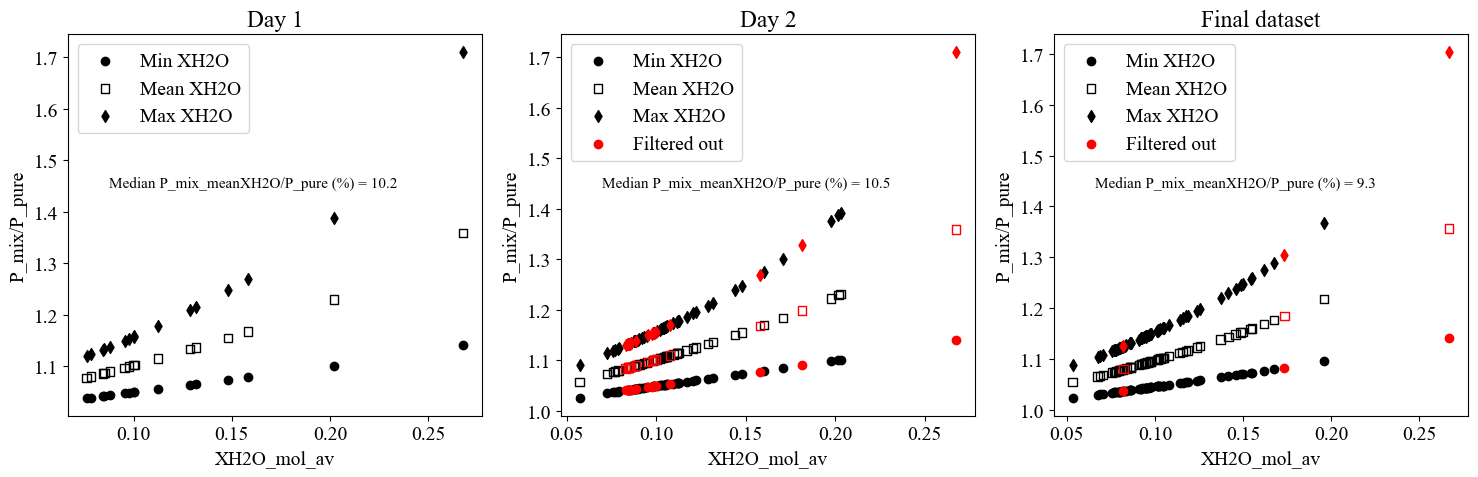

In [24]:
x='XH2O_mol_av'
ymin='P_mix_min/P_pureCO2'
yav='P_mix_av/P_pureCO2'
ymax='P_mix_max/P_pureCO2'

# day 4 filter

fi23_filt=~(round(fi23['SO2_Diad_Ratio'],2)>0.22)

# Filter for day2 data
day2_filt=~(day2_og['SO2_Diad_Ratio']>0.1)


# Create figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot data on each panel
axs[0].scatter(day1[x], day1[ymin], color='k', marker='o',label='Min XH2O')
axs[0].scatter(day1[x], day1[yav], facecolor='none', edgecolor='k', marker='s',label='Mean XH2O')
axs[0].scatter(day1[x], day1[ymax], color='k', marker='d',label='Max XH2O')
axs[0].set_xlabel(x)
axs[0].set_ylabel('P_mix/P_pure')
axs[0].set_title('Day 1')
axs[0].text(0.1, 0.6, 'Median P_mix_meanXH2O/P_pure (%) = '+str(round(100*(np.median(day1[yav])-1),1)), fontsize=11, transform=axs[0].transAxes)

axs[1].scatter(day2_og[day2_filt][x], day2_og[day2_filt][ymin], color='k', marker='o',label='Min XH2O')
axs[1].scatter(day2_og[day2_filt][x], day2_og[day2_filt][yav], facecolor='none', edgecolor='k', marker='s',label='Mean XH2O')
axs[1].scatter(day2_og[day2_filt][x], day2_og[day2_filt][ymax], color='k', marker='d',label='Max XH2O')

axs[1].scatter(day2_og[~day2_filt][x], day2_og[~day2_filt][ymin], color='r', marker='o',label='Filtered out')
axs[1].scatter(day2_og[~day2_filt][x], day2_og[~day2_filt][yav], facecolor='none', edgecolor='r', marker='s')
axs[1].scatter(day2_og[~day2_filt][x], day2_og[~day2_filt][ymax], color='r', marker='d')

axs[1].set_xlabel(x)
axs[1].set_ylabel('P_mix/P_pure')
axs[1].set_title('Day 2')
axs[1].text(0.1, 0.6, 'Median P_mix_meanXH2O/P_pure (%) = '+str(round(100*(np.median(day2_og[day2_filt][yav])-1),1)), fontsize=11, transform=axs[1].transAxes)

axs[2].scatter(fi23[fi23_filt][x], fi23[fi23_filt][ymin], color='k', marker='o',label='Min XH2O')
axs[2].scatter(fi23[fi23_filt][x], fi23[fi23_filt][yav], facecolor='none', edgecolor='k', marker='s',label='Mean XH2O')
axs[2].scatter(fi23[fi23_filt][x], fi23[fi23_filt][ymax], color='k', marker='d',label='Max XH2O')

axs[2].scatter(fi23[~fi23_filt][x], fi23[~fi23_filt][ymin], color='r', marker='o',label='Filtered out')
axs[2].scatter(fi23[~fi23_filt][x], fi23[~fi23_filt][yav], facecolor='none', edgecolor='r', marker='s')
axs[2].scatter(fi23[~fi23_filt][x], fi23[~fi23_filt][ymax], color='r', marker='d')
axs[2].set_xlabel(x)
axs[2].set_ylabel('P_mix/P_pure')
axs[2].set_title('Final dataset')

axs[2].text(0.1, 0.6, 'Median P_mix_meanXH2O/P_pure (%) = '+str(round(100*(np.median(fi23[fi23_filt][yav])-1),1)), fontsize=11, transform=axs[2].transAxes)

axs[0].legend()
axs[1].legend()
axs[2].legend()
# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [25]:
np.median(fi23['Temp_from_Fo'])
np.mean(fi23['Temp_from_Fo'])

1238.3320176251887

In [26]:
fi23['Depth_km_mix']=pf.convert_pressure_to_depth(fi23['P_kbar_mixCO2_DZ06_Hloss_i5_av'],crust_dens_kgm3=2300)

## FIG 1panel d add on histogram

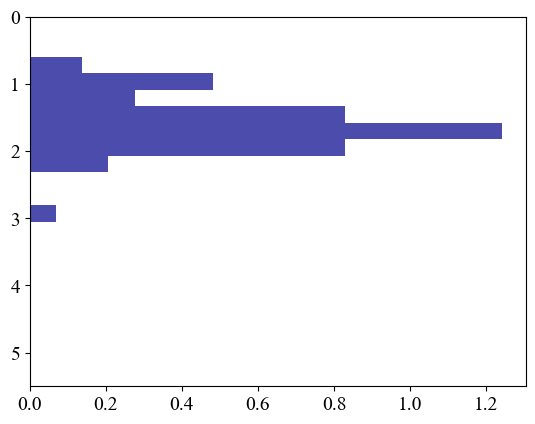

In [27]:

fi23_filt=~(round(fi23['SO2_Diad_Ratio'],2)>0.22)
fi_data_col='Depth_km_mix'
val_lim=[5.5, 0]

fig,ax=plt.subplots(1,1)
ax.hist(fi23[fi23_filt][fi_data_col],alpha=0.7,density=1,orientation='horizontal',color='darkblue', bins=10)
ax.set_ylim(val_lim)

directory=os.path.join(os.getcwd(), 'Notebook_output')
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(os.path.join(os.getcwd(), 'Notebook_output', "Add_On_Fig3_mixH2O_final_histogram.pdf"))

## Fig S2 cumulative probabilities 

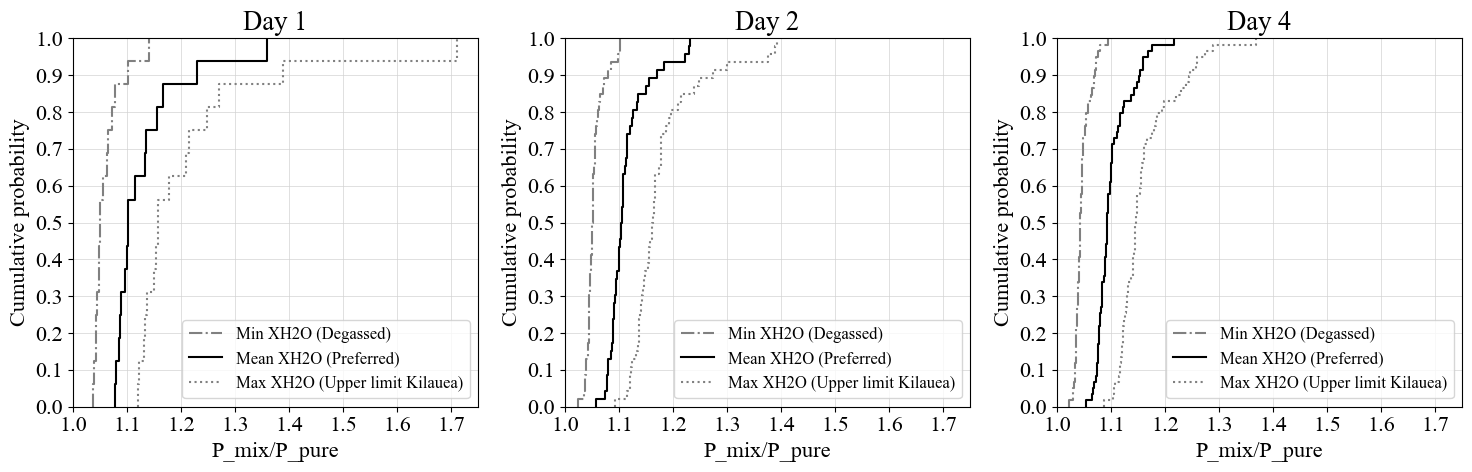

In [31]:
x='Density g/cm3'
ymin='P_mix_min/P_pureCO2'
yav='P_mix_av/P_pureCO2'
ymax='P_mix_max/P_pureCO2'
from matplotlib.ticker import MultipleLocator


fi23_filt=~(round(fi23['SO2_Diad_Ratio'],2)>0.22)

# Filter for day2 data
day2_filt=~(day2_og['SO2_Diad_Ratio']>0.1)


# Create figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot data on each panel
axs[0].ecdf(day1[ymin], label='Min XH2O (Degassed)',color='grey',linestyle="-.")
axs[0].ecdf(day1[yav], label='Mean XH2O (Preferred)',color='k')
axs[0].ecdf(day1[ymax], label='Max XH2O (Upper limit Kilauea)',color='grey',linestyle=":")

axs[0].set_xlabel('P_mix/P_pure')
axs[0].set_ylabel('Cumulative probability')
axs[0].set_title('Day 1')
axs[0].xaxis.set_major_locator(MultipleLocator(0.1))
axs[0].yaxis.set_major_locator(MultipleLocator(0.1))
axs[0].grid(which='both', color='lightgrey', linestyle='-', linewidth=0.5)



axs[1].ecdf(day2_og[day2_filt][ymin], label='Min XH2O (Degassed)',color='grey',linestyle="-.")
axs[1].ecdf(day2_og[day2_filt][yav], label='Mean XH2O (Preferred)',color='k')
axs[1].ecdf(day2_og[day2_filt][ymax], label='Max XH2O (Upper limit Kilauea)',color='grey',linestyle=":")

axs[1].set_xlabel('P_mix/P_pure')
axs[1].set_ylabel('Cumulative probability')
axs[1].set_title('Day 2')
axs[1].xaxis.set_major_locator(MultipleLocator(0.1))
axs[1].yaxis.set_major_locator(MultipleLocator(0.1))
axs[1].grid(which='both', color='lightgrey', linestyle='-', linewidth=0.5)



axs[2].ecdf(fi23[fi23_filt][ymin], label='Min XH2O (Degassed)',color='grey',linestyle="-.")
axs[2].ecdf(fi23[fi23_filt][yav], label='Mean XH2O (Preferred)',color='k')
axs[2].ecdf(fi23[fi23_filt][ymax], label='Max XH2O (Upper limit Kilauea)',color='grey',linestyle=":")

axs[2].set_xlabel('P_mix/P_pure')
axs[2].set_ylabel('Cumulative probability')
axs[2].set_title('Day 4')
axs[2].xaxis.set_major_locator(MultipleLocator(0.1))
axs[2].yaxis.set_major_locator(MultipleLocator(0.1))

axs[2].grid(which='both', color='lightgrey', linestyle='-', linewidth=0.5)


for i,ax in enumerate(axs):
    ax.legend(fontsize=12)
    ax.set_xlim([1,1.75])

plt.tight_layout()

plt.show()


directory=os.path.join(os.getcwd(), 'Notebook_output')
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(os.path.join(os.getcwd(), 'Notebook_output', "FigS1_XH2Ocorrection.pdf"))
fig.savefig(os.path.join(os.getcwd(), 'Notebook_output',"FigS1_XH2Ocorrection.png"),dpi=300)
